In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

fname = r'C:\\crs\\proj\\2019_DUNEX\\Pea_Island_Data\\03_Bathy\\swash_profile.xyz'
max_depth = -12.
dx = 0.5



df0 = pd.read_csv(fname,skiprows=1,sep=',',header=None,names=['x','y','z'])
df0
df0.describe()
x = df0['x'].values
y = df0['y'].values
z = df0['z'].values
dst = np.sqrt((x - x[-1])**2+(y-y[-1])**2)
if(z[0]>z[-1]):
    # flip arrays to make profile go from deep to shallow
    z = np.flip(z).copy()
    dst = np.flip(dst).copy()

In [8]:
idx = np.argwhere(z>=max_depth)[0]
print('idx[0] = ',idx,'. Deepest sample is z=',z[idx],' at x = ',dst[idx])

idx[0] =  [293] . Deepest sample is z= [-11.995]  at x =  [520.15495824]


In [32]:
# offset origin to deepest point requested
dst = dst-dst[idx[0]]
print(np.floor(np.max(dst)))

# resample at requested dx
x = np.arange(0.,np.round(np.max(dst)),dx)

1295.0


In [33]:
x

array([0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 1.2945e+03, 1.2950e+03,
       1.2955e+03])

In [34]:
fx = scipy.interpolate.interp1d(dst,z)
zi = fx(x)

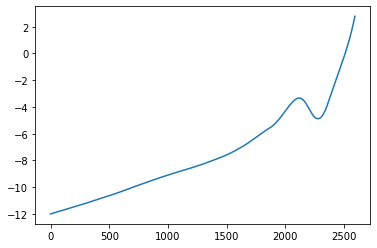

In [36]:
plt.plot(zi)